In [ ]:
library(tidyverse)
library(dplyr)
library(knitr)
library(ggplot2)
library(tidymodels)

<<<<<<< local
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()

**Introduction**

**Method & Results**

In [2]:
players <- read_csv("data/players.csv")
players


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [2]:
players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

head(players)
head(sessions)

ERROR: Error: 'data/players.csv' does not exist in current working directory ('/home/jovyan/work/final_project/dsci-100-final-report').


In [3]:
<<<<<<< REMOTE CELL DELETED >>>>>>>
players <- players |>
  mutate(
    gender = as_factor(gender),
    experience = as_factor(experience),
    subscribe = as_factor(subscribe)
  )

In [4]:
<<<<<<< REMOTE CELL DELETED >>>>>>>
mean_values <- players |> 
  summarize(
    mean_age = mean(Age, na.rm = TRUE),
    mean_played_hours = mean(played_hours, na.rm = TRUE)
  )

kable(mean_values, caption = "Mean Values of Player Data")



Table: Mean Values of Player Data

| mean_age| mean_played_hours|
|--------:|-----------------:|
| 20.52062|          5.845918|

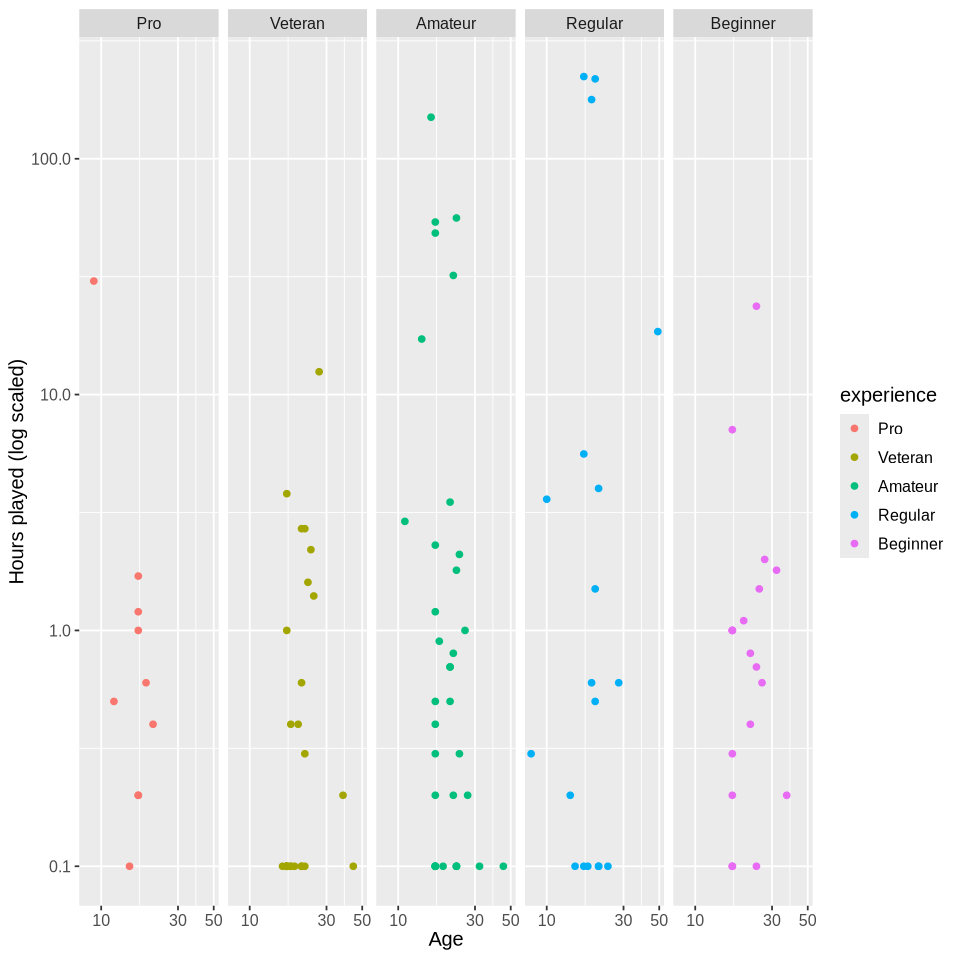

In [5]:
<<<<<<< REMOTE CELL DELETED >>>>>>>
options(repr.plot.width = 8, repr.plot.height = 8)

players_filtered <- players |>
                    filter(Age > 0 & played_hours > 0)

players_filtered |>
    ggplot(aes(x = Age, y = played_hours, color = experience)) +
    geom_point() +
    scale_y_log10() +
    scale_x_log10() +
    labs(x = "Age",
         y = "Hours played (log scaled)") +
    facet_grid(cols = vars(experience)) +
    theme(text = element_text(size = 12))

In [6]:
players_filtered$experience <- factor(
  players_filtered$experience,
  levels = c("Pro", "Veteran", "Amateur", "Regular", "Beginner"),
  labels = c("5", "4", "3", "2", "1")
)

players_filtered

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
5,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
4,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
2,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
3,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17
4,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
1,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25
3,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
3,TRUE,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17


arav - experience + age classification model
kian - gender + hours_played model

In [21]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_recipe <- recipe(subscribe ~ Age + played_hours, data = players_filtered) |>
  step_normalize(all_predictors())

knn_workflow <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec)

knn_fit <- fit(knn_workflow, data = players_filtered)

new_obs <- tibble(Age = 21, played_hours = 1)

class_prediction <- predict(knn_fit, new_data = new_obs)
class_prediction

.pred_class
<fct>
TRUE


In [20]:
knn_recipe <- recipe(subscribe ~ experience + Age, data = players_filtered) |>
  step_normalize(all_numeric_predictors())

knn_workflow <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec)

knn_fit <- fit(knn_workflow, data = players_filtered)

new_obs <- tibble(Age = 80, experience = factor("1", levels = levels(players_filtered$experience)))

class_prediction <- predict(knn_fit, new_data = new_obs)
class_prediction

.pred_class
<fct>
TRUE
